<a href="https://colab.research.google.com/github/SOUMEE2000/Sentiment-Analysis-guidelines-IMDB-Datset-/blob/main/Word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Techniques to predict the next words or sentences**

In [ ]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### **Preprocessing text**

In [ ]:
from nltk import bigrams, word_tokenize
import numpy as np
import collections
from collections import Counter

In [ ]:
# importing from nltk in raw form
emma=nltk.corpus.gutenberg.raw("austen-emma.txt")

# removing punctuation from the text and lowering it
def remove_punctuation(text):
   punctuation=[',','.','\n','\\',']','[',';',':','\'s','_','-','?','\"',"(",')']
   for i in punctuation:
     text=str(text).replace(str(i)," ")
   return text
new_emma= remove_punctuation(emma)
new_emma= new_emma.lower()
new_emma

### **Using Bi-grams**

In [ ]:
#creating bigram of the corpus
bigrm = list(nltk.bigrams(word_tokenize(new_emma)))
bigrm

In [ ]:
# converting to a probabilistic language model
probability_score=[]
word=[]

def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for w1, w2 in bigrm:
        bigram_model[w1][w2] += 1
    for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model

def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)

    for i in top10words:
      probability_score.append(i[1])
      word.append(i[0])

In [ ]:
predict_next_word('how')

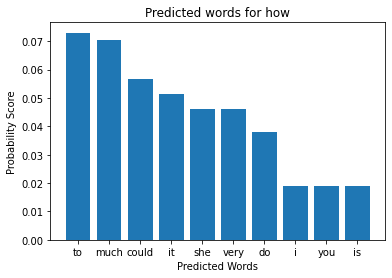

In [ ]:
import matplotlib.pyplot as plt
x_pos = np.arange(len(word))
plt.bar(x_pos,probability_score,align='center')
plt.xticks(x_pos,word)
plt.ylabel('Probability Score')
plt.xlabel('Predicted Words')
plt.title('Predicted words for ' + 'how')
plt.show()

In [ ]:
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Quite the same process for trigramns and 4-grams**

### **Using trigrams**

In [ ]:
#creating bigram of the corpus
trigrm = list(nltk.trigrams(word_tokenize(new_emma)))
trigrm

In [ ]:
# converting to a probabilistic language model
probability_score=[]
word=[]

def build_trigram_model():
    trigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for w1, w2, w3 in trigrm:
        trigram_model[(w1,w2)][w3] += 1
    for w1_w2 in trigram_model:
            #total count of bigrams starting with w1_w2
            trigram_count_4_w1_w2 = float(sum(trigram_model[w1_w2].values()))
            #distribute the probability mass for all trigrams starting with w1_w2
            for w3 in trigram_model[w1_w2]:
                trigram_model[w1_w2][w3] /= trigram_count_4_w1_w2
    return trigram_model

def predict_next_word(w1, w2):
    #buikd the model
    model = build_trigram_model()
    #get the next for the trigram starting with 'word'
    second_word = model[(w1,w2)]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(15)

    for i in top10words:
      probability_score.append(i[1])
      word.append(i[0])

In [ ]:
predict_next_word('how','far')

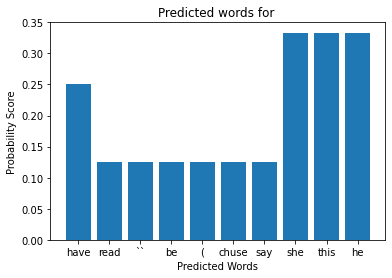

In [ ]:
import matplotlib.pyplot as plt
x_pos = np.arange(len(word))
plt.bar(x_pos,probability_score,align='center')
plt.xticks(x_pos,word)
plt.ylabel('Probability Score')
plt.xlabel('Predicted Words')
plt.title('Predicted words for ')
plt.show()

In [ ]:
word

['you', 'they']

### **Using LSTM**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
source="https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/"

##### **One-input, one-output model(needs maintenance**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([new_emma])
encoded = tokenizer.texts_to_sequences([new_emma])[0]

In [ ]:
encoded

In [ ]:
tokenizer.word_index

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7128


In [ ]:
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)


In [ ]:
# split into X and y elements
import numpy as np
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [ ]:
# Getting one-hot encoded vector
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
import tensorflow.keras as tf
model=tf.models.Sequential()
model.add(tf.layers.Embedding(vocab_size, 10, input_length=1))
model.add(tf.layers.LSTM(50))
model.add(tf.layers.Dense(vocab_size, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             71280     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 7128)              363528    
Total params: 447,008
Trainable params: 447,008
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

In [ ]:
# getting predictions from the model, predicting next 5 words
sent=""
in_text = "You"
for i in range(5):
  sent= sent+" " + in_text
  encoded_text = tokenizer.texts_to_sequences([in_text])[0]
  encoded_text = np.array(encoded_text)
  yhat = np.argmax(model.predict(encoded_text))
  for word, index in tokenizer.word_index.items():
    if index == yhat:
      in_text=word
      break

In [ ]:
print(sent)
# doesn't make any sense whatsoever

In [ ]:
#using model.save_weights() to save the weights of the model in HDF5 format
# remove while uploading to github about loading
model.save_weights("/content/gdrive/My Drive/weights.h5")

In [ ]:
model.load_weights("/content/gdrive/My Drive/weights.h5")

In [ ]:
tokenizer.word_index

In [ ]:
yhat

In [ ]:
source="https://stackoverflow.com/questions/41859997/keras-model-load-weights-for-neural-net/41860156"
# loading models

##### **Line-by- line sequence model**

In [ ]:
# Here preprocessing is a bit different because lines have to be separated. We don't remove the '.' to indicate end of line
# importing from nltk in raw form
emma=nltk.corpus.gutenberg.raw("austen-emma.txt")

# removing punctuation from the text and lowering it
def remove_punctuation(text):
   punctuation=[',','\n','\\',']','[',';',':','\'s','_','-','?','\"',"(",')']
   for i in punctuation:
     text=str(text).replace(str(i)," ")
   return text
new_emma= remove_punctuation(emma)
new_emma= new_emma.lower()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([new_emma])
# create line-based sequences
sequences = []
for line in new_emma.split('.'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
      sequence = encoded
      sequences.append(sequence)


In [ ]:
len(sequences)

152247

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
# padding input
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

In [ ]:
#split into output and input sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
vocab_size = len(tokenizer.word_index) + 1
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
import tensorflow.keras as tf
model=tf.models.Sequential()
model.add(tf.layers.Embedding(vocab_size, 10, input_length=1))
model.add(tf.layers.LSTM(50))
model.add(tf.layers.Dense(vocab_size, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             71280     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 7128)              363528    
Total params: 447,008
Trainable params: 447,008
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save_weights("/content/gdrive/My Drive/weights_line.h5")

Mounted at /content/gdrive


In [ ]:
sent=""
in_text = "What"
for i in range(5):
  sent= sent+" " + in_text
  encoded_text = tokenizer.texts_to_sequences([in_text])[0]
  encoded_text = np.array(encoded_text)
  yhat = np.argmax(model.predict(encoded_text))
  for word, index in tokenizer.word_index.items():
    if index == yhat:
      in_text=word
      break
sent

' What stir off very martin'

 **Other one is two words input one word input or inputting subsequences of a statement. That is similar to the first one. The ouput for some of the kernels have been cleared to reduce the size of the notebook.**